# Categorical Feature Encoding Challenge EDA + ML

![](https://www.petmd.com/sites/default/files/what-does-it-mean-when-cat-wags-tail.jpg)

In this competition, you will be predicting the probability [0, 1] of a binary target column.

The data contains binary features (bin_*), nominal features (nom_*), ordinal features (ord_*) as well as (potentially cyclical) day (of the week) and month features. The string ordinal features ord_{3-5} are lexically ordered according to string.ascii_letters.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/cat-in-the-dat/test.csv
/kaggle/input/cat-in-the-dat/train.csv
/kaggle/input/cat-in-the-dat/sample_submission.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/cat-in-the-dat/train.csv")

In [3]:
train_df.shape

(300000, 25)

In [4]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,T,Y,Green,Triangle,Snake,Finland,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [5]:
train_df.columns

Index(['id', 'bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1',
       'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9',
       'ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month',
       'target'],
      dtype='object')

In [6]:
train_df.dtypes

id         int64
bin_0      int64
bin_1      int64
bin_2      int64
bin_3     object
bin_4     object
nom_0     object
nom_1     object
nom_2     object
nom_3     object
nom_4     object
nom_5     object
nom_6     object
nom_7     object
nom_8     object
nom_9     object
ord_0      int64
ord_1     object
ord_2     object
ord_3     object
ord_4     object
ord_5     object
day        int64
month      int64
target     int64
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

columns = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9']

for col in columns:
    
    le.fit(train_df[col])
    train_df[col] = le.transform(train_df[col]) 

In [8]:
train_df.loc[train_df['bin_3'] == 'T', 'bin_3'] = 1
train_df.loc[train_df['bin_3'] == 'F', 'bin_3'] = 0

In [9]:
train_df.loc[train_df['bin_4'] == 'Y', 'bin_4'] = 1
train_df.loc[train_df['bin_4'] == 'N', 'bin_4'] = 0

In [10]:
train_df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,1,5,5,3,...,2175,2,Grandmaster,Cold,h,D,kr,2,2,0
1,1,0,1,0,1,1,1,4,3,5,...,11635,1,Grandmaster,Hot,a,A,bF,7,8,0
2,2,0,0,0,0,1,0,4,4,5,...,8078,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,3,0,1,0,0,1,2,4,5,0,...,6056,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,4,0,0,0,0,0,2,4,4,0,...,8231,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [11]:
train_df.ord_1.value_counts()

Novice         126583
Grandmaster     77428
Contributor     42871
Master          28053
Expert          25065
Name: ord_1, dtype: int64

In [12]:
train_df.describe()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,day,month,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.00000
mean,149999.500000,0.127503,0.256607,0.383223,0.511783,0.638777,0.934423,2.756827,2.826943,2.847563,1.418510,110.20711,262.646227,611.669607,1110.392683,5962.873470,1.479567,3.007817,5.771113,0.30588
std,86602.684716,0.333537,0.436761,0.486173,0.499862,0.480356,0.755799,1.563023,1.670861,1.912415,1.031809,63.95555,151.705710,359.406009,638.366132,3446.666869,0.712524,1.817949,3.843519,0.46078
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000
25%,74999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,54.00000,131.000000,297.000000,562.000000,2993.000000,1.000000,2.000000,2.000000,0.00000
50%,149999.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,3.000000,3.000000,1.000000,106.00000,263.000000,614.000000,1115.000000,5925.000000,1.000000,3.000000,4.000000,0.00000
75%,224999.250000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,5.000000,2.000000,167.00000,399.000000,921.000000,1660.000000,8941.000000,2.000000,4.000000,9.000000,1.00000
max,299999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,5.000000,5.000000,5.000000,3.000000,221.00000,521.000000,1219.000000,2214.000000,11980.000000,3.000000,7.000000,12.000000,1.00000


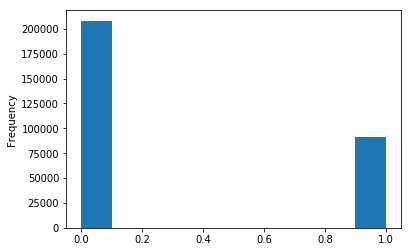

In [13]:
train_df.target.plot(kind="hist")